# Credit Card Fraud Detection

In [2]:
# loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Inspection

In [4]:
df=pd.read_csv('creditcard.csv',low_memory=False)

In [5]:
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


In [6]:
df.shape

(150002, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [8]:
df.describe()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
count,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,6.670221e+03,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387
std,0.249746,249.755371,14.771866,1.438467e+04,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,3.400000e+03,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,5.400000e+03,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000
75%,0.000000,0.559046,63.000000,8.249000e+03,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000
max,1.000000,50708.000000,109.000000,3.008750e+06,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000


# data preprocessing

In [9]:
df.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

In [10]:
df.drop(['MonthlyIncome.1'],axis=1,inplace=True)

In [11]:
df[df['NPA Status'].isnull()]

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN


In [12]:
df.drop(np.where(df['NPA Status'].isnull())[0],axis=0,inplace=True)

In [13]:
df.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

<AxesSubplot:>

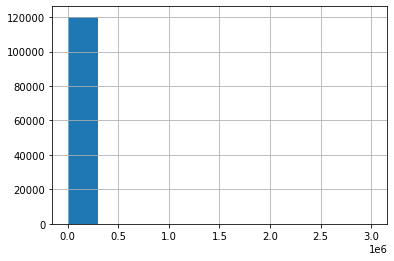

In [14]:
df['MonthlyIncome'].hist()


In [15]:
df['MonthlyIncome']=df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

<AxesSubplot:>

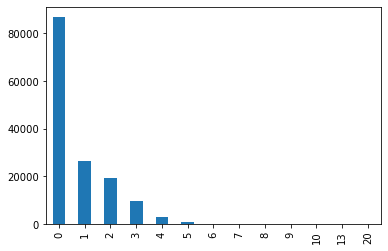

In [16]:
df['NumberOfDependents'].value_counts().plot.bar()

In [17]:
df['NumberOfDependents']=df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0])

In [18]:
df.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
MonthlyIncome                           0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Good_Bad                                0
dtype: int64

# Exploratory data analysis

In [20]:
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,0,Good


<AxesSubplot:>

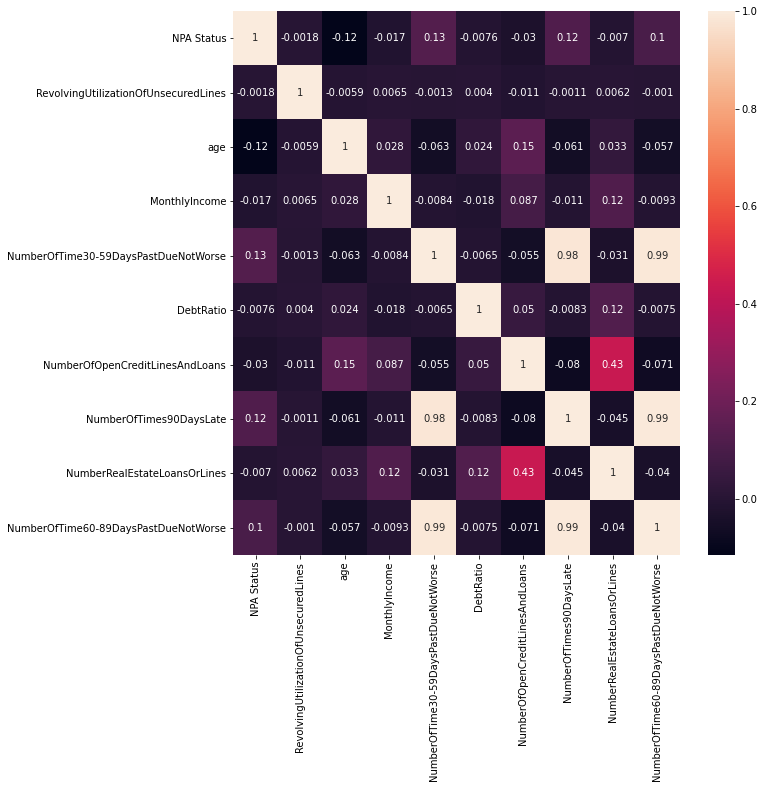

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         150000 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [22]:
df['NumberOfDependents']=df['NumberOfDependents'].astype(float)

In [23]:
df['NPA Status']=df['NPA Status'].astype(object)

In [24]:
obj=df.select_dtypes('object')

In [25]:
obj

,NPA Status,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
0,1,Male,South,Ownhouse,Self_Emp,Matric,Bad
1,0,Female,South,Ownhouse,Self_Emp,Graduate,Good
2,0,Female,South,Ownhouse,Self_Emp,PhD,Good
3,0,Female,South,Ownhouse,Self_Emp,Professional,Good
4,0,Male,South,Ownhouse,Self_Emp,Post-Grad,Good
...,...,...,...,...,...,...,...
149995,0,Male,North,Ownhouse,Non-officer,Professional,Good
149996,0,Male,North,Ownhouse,Self_Emp,Professional,Good
149997,0,Male,North,Rented,Officer2,Professional,Good
149998,0,Male,North,Rented,Non-officer,Professional,Good


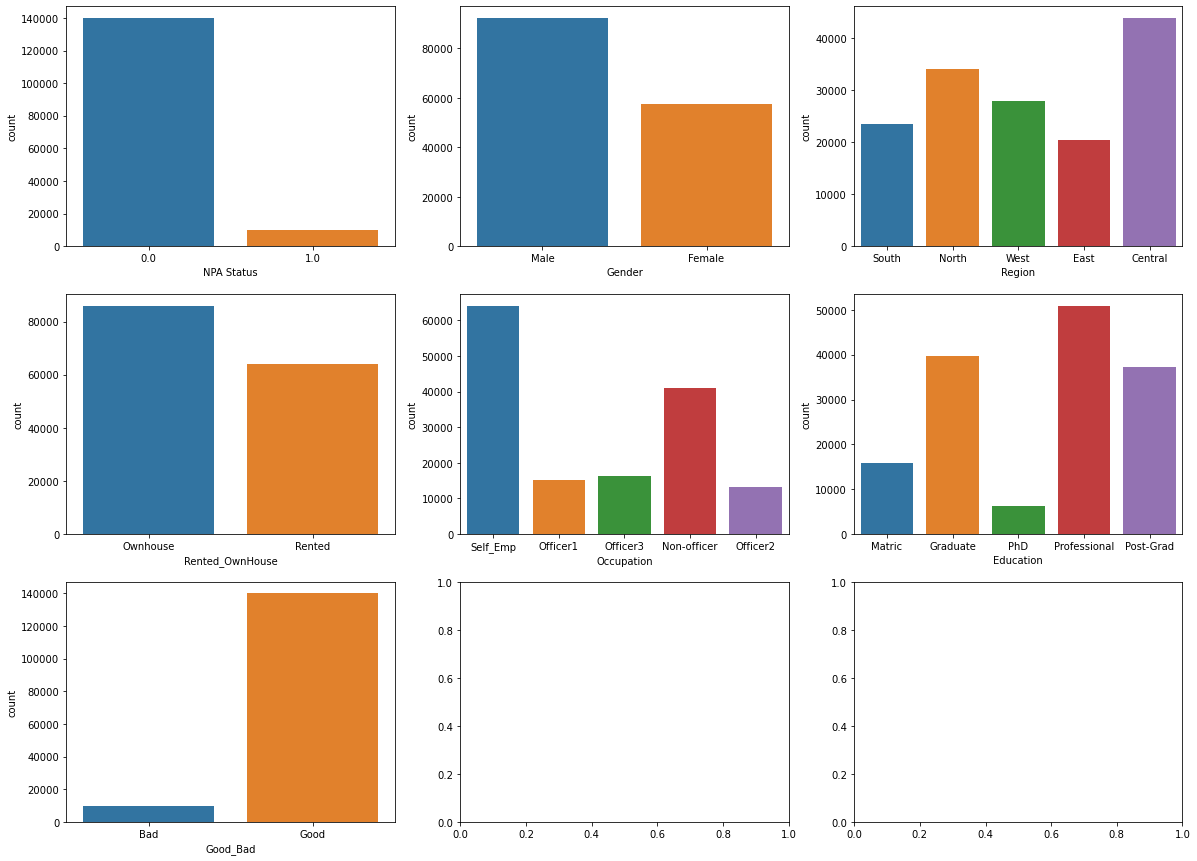

In [26]:
fig,ax=plt.subplots(3,3,figsize=(20,15))
for var,subplot in zip(obj.columns,ax.flatten()):
    sns.countplot(obj[var],ax=subplot)

In [27]:
num=df.select_dtypes('float64')

In [28]:
num

,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45.0,9120.0,2.0,0.802982,13.0,0.0,6.0,0.0,2.0
1,0.957151,40.0,2600.0,0.0,0.121876,4.0,0.0,0.0,0.0,1.0
2,0.658180,38.0,3042.0,1.0,0.085113,2.0,1.0,0.0,0.0,0.0
3,0.233810,30.0,3300.0,0.0,0.036050,5.0,0.0,0.0,0.0,0.0
4,0.907239,49.0,63588.0,1.0,0.024926,7.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74.0,2100.0,0.0,0.225131,4.0,0.0,1.0,0.0,0.0
149996,0.299745,44.0,5584.0,0.0,0.716562,4.0,0.0,1.0,0.0,2.0
149997,0.246044,58.0,5400.0,0.0,3870.000000,18.0,0.0,1.0,0.0,0.0
149998,0.000000,30.0,5716.0,0.0,0.000000,4.0,0.0,0.0,0.0,0.0


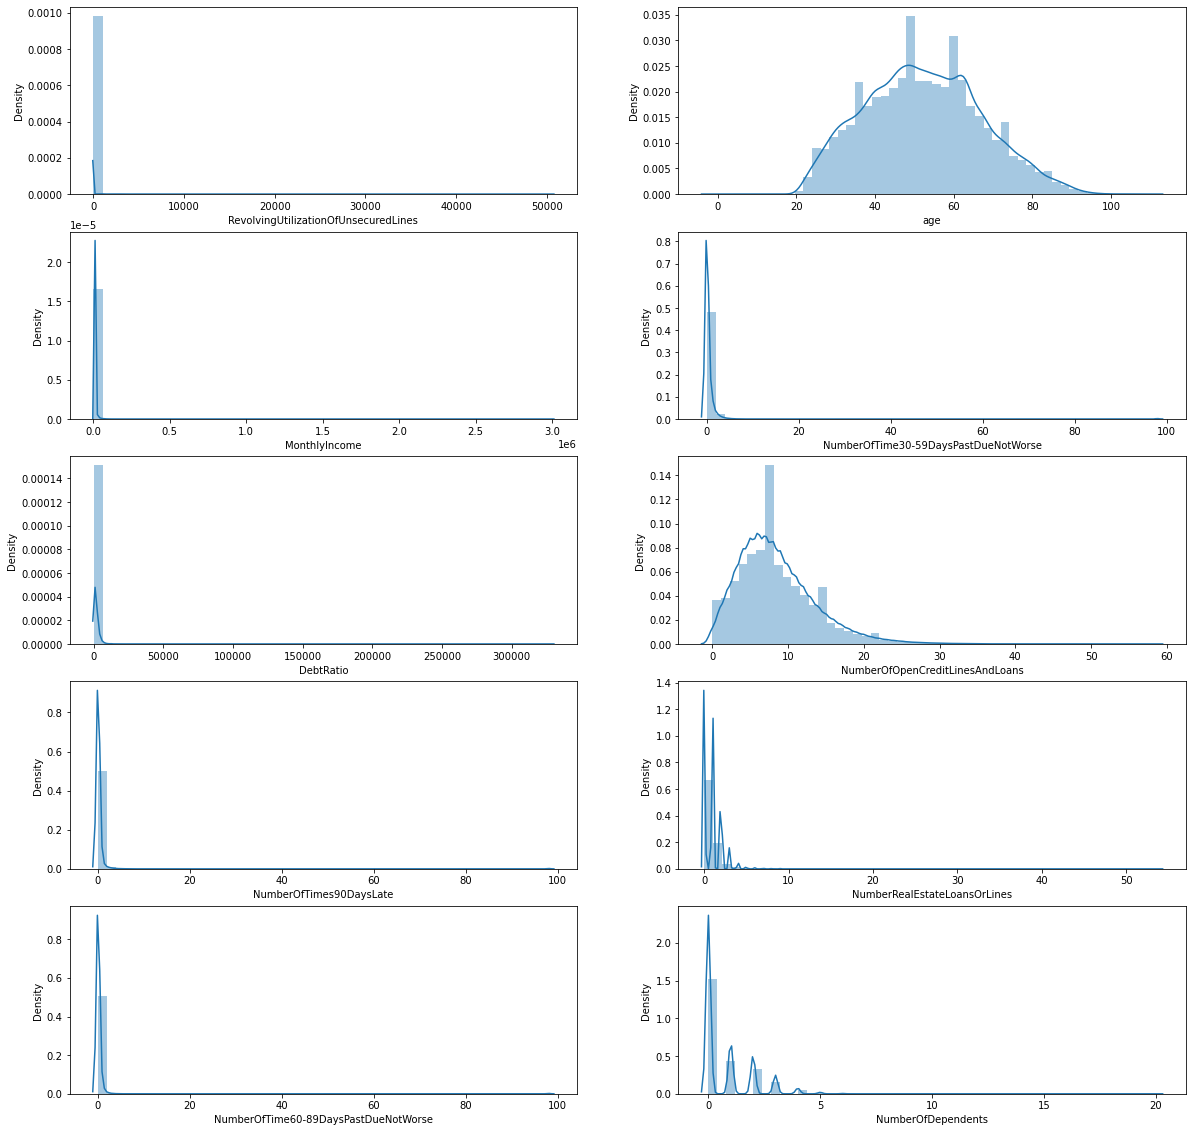

In [29]:
fig,ax=plt.subplots(5,2,figsize=(20,20))
for var,subplot in zip(num.columns,ax.flatten()):
    sns.distplot(num[var],ax=subplot)

In [30]:
df.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')

In [31]:
number=df[['NPA Status','NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]

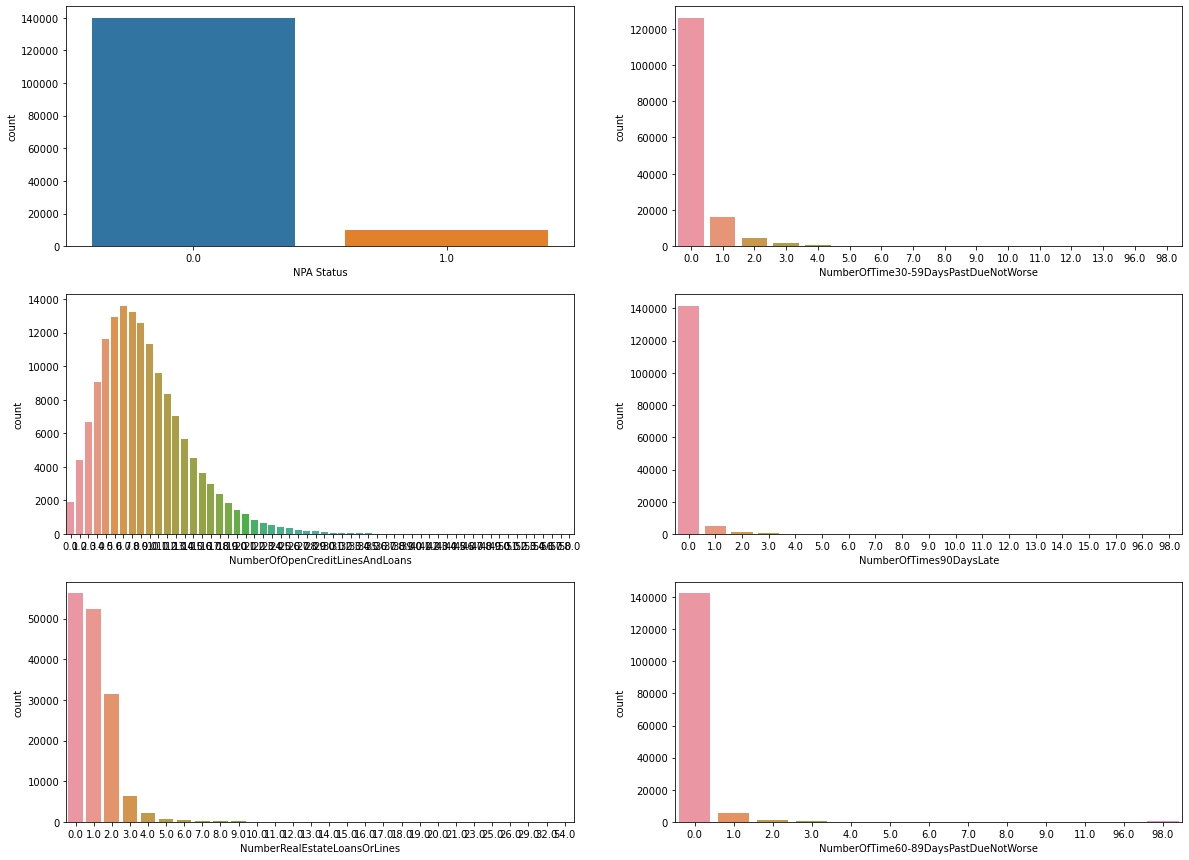

In [32]:
fig,ax=plt.subplots(3,2,figsize=(20,15))
for var,subplot in zip(number.columns,ax.flatten()):
    sns.countplot(number[var],ax=subplot)

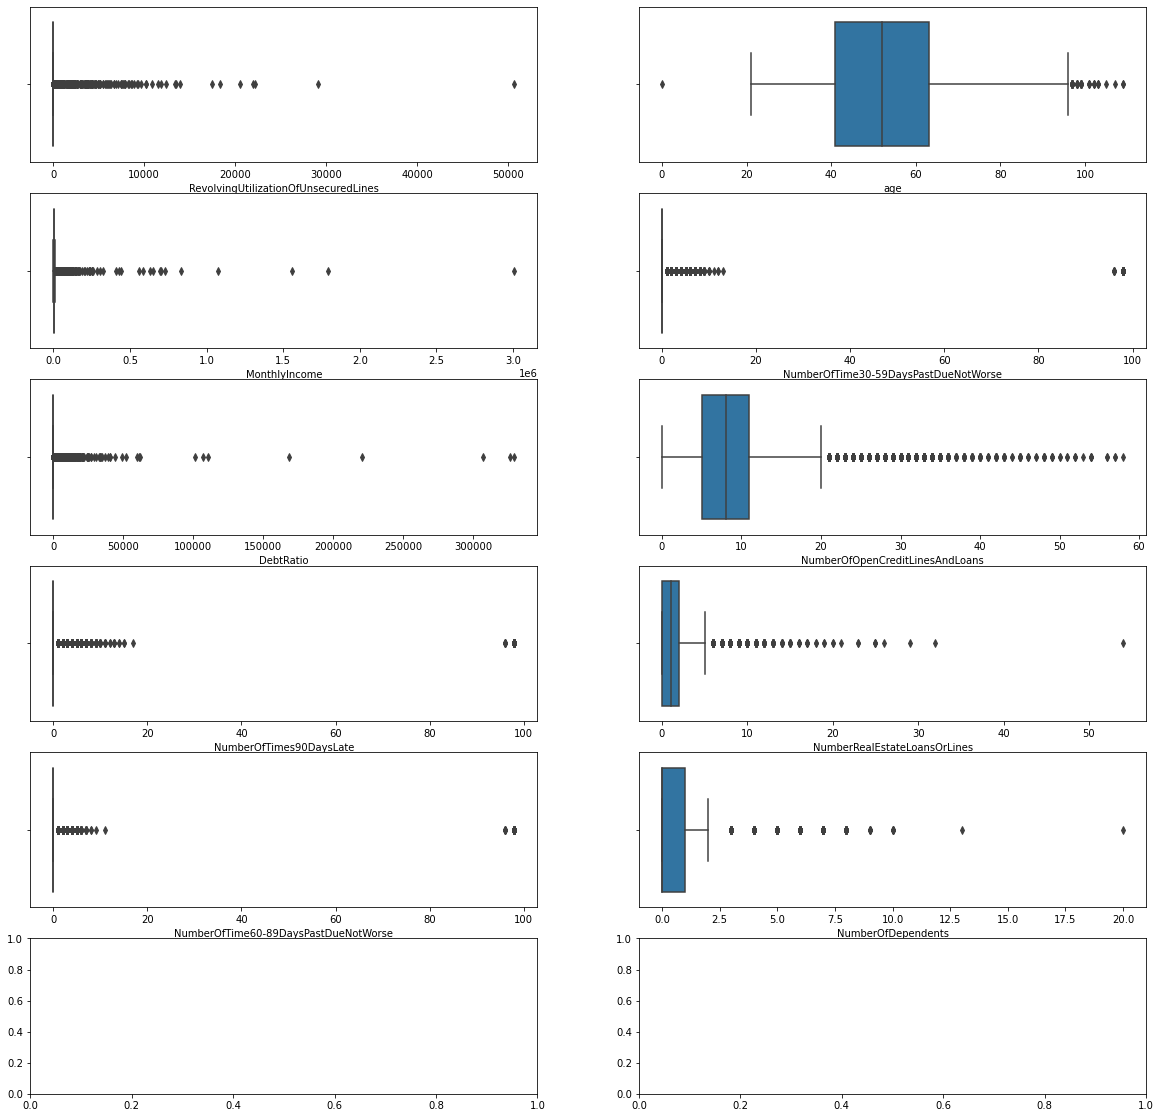

In [33]:
fig,ax=plt.subplots(6,2,figsize=(20,20))
for var,subplot in zip(num.columns,ax.flatten()):
    sns.boxplot(num[var],ax=subplot)

# Feature Selection

In [45]:
obj.head()

,NPA Status,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
0,1,Male,South,Ownhouse,Self_Emp,Matric,Bad
1,0,Female,South,Ownhouse,Self_Emp,Graduate,Good
2,0,Female,South,Ownhouse,Self_Emp,PhD,Good
3,0,Female,South,Ownhouse,Self_Emp,Professional,Good
4,0,Male,South,Ownhouse,Self_Emp,Post-Grad,Good


In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
lb=LabelEncoder()
obj1=obj.apply(lb.fit_transform)

In [48]:
obj1.head()

,NPA Status,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
0,1,1,3,0,4,1,0
1,0,0,3,0,4,0,1
2,0,0,3,0,4,2,1
3,0,0,3,0,4,4,1
4,0,1,3,0,4,3,1


In [49]:
y=obj1['Good_Bad']

In [50]:
obj1.drop(['Good_Bad'],axis=1,inplace=True)

In [51]:
from sklearn.feature_selection import chi2

In [52]:
chisq=chi2(obj1,y)

In [53]:
chisq

(array([1.39974000e+05, 1.35736842e+00, 8.57256291e+03, 7.32621097e-01,
        2.79330648e-01, 2.18863964e+02]),
 array([0.00000000e+00, 2.43994078e-01, 0.00000000e+00, 3.92034906e-01,
        5.97140270e-01, 1.60023918e-49]))

In [54]:
z,p=chi2(obj1,y)

In [55]:
pvalue=pd.Series(p,index=obj1.columns)

<AxesSubplot:>

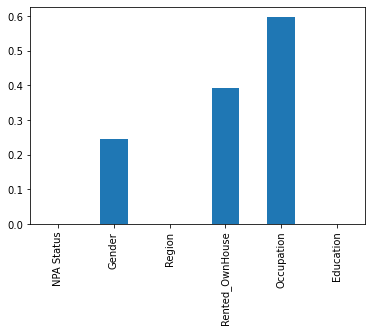

In [56]:
pvalue.plot.bar()

In [57]:
pvalue[pvalue>0.05].index

Index(['Gender', 'Rented_OwnHouse', 'Occupation'], dtype='object')

In [58]:
obj1.drop(pvalue[pvalue>0.05].index,axis=1,inplace=True)

In [60]:
obj1.head()

,NPA Status,Region,Education
0,1,3,1
1,0,3,0
2,0,3,2
3,0,3,4
4,0,3,3


In [61]:
num.head()

,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45.0,9120.0,2.0,0.802982,13.0,0.0,6.0,0.0,2.0
1,0.957151,40.0,2600.0,0.0,0.121876,4.0,0.0,0.0,0.0,1.0
2,0.658180,38.0,3042.0,1.0,0.085113,2.0,1.0,0.0,0.0,0.0
3,0.233810,30.0,3300.0,0.0,0.036050,5.0,0.0,0.0,0.0,0.0
4,0.907239,49.0,63588.0,1.0,0.024926,7.0,0.0,1.0,0.0,0.0


In [62]:
from scipy.stats import pearsonr

In [66]:
pval=[]
for i in num.columns:
    stat,pvalue=pearsonr(num[i],y)
    pval.append(pvalue)

In [69]:
pval=pd.Series(pval,index=num.columns)

In [72]:
i=pval[pval>0.05].index

In [75]:
num.drop(i[0],axis=1,inplace=True)

In [76]:
num.head()

,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,45.0,9120.0,2.0,0.802982,13.0,0.0,6.0,0.0,2.0
1,40.0,2600.0,0.0,0.121876,4.0,0.0,0.0,0.0,1.0
2,38.0,3042.0,1.0,0.085113,2.0,1.0,0.0,0.0,0.0
3,30.0,3300.0,0.0,0.036050,5.0,0.0,0.0,0.0,0.0
4,49.0,63588.0,1.0,0.024926,7.0,0.0,1.0,0.0,0.0


In [78]:
obj1.head()

,NPA Status,Region,Education
0,1,3,1
1,0,3,0
2,0,3,2
3,0,3,4
4,0,3,3


In [83]:
X=pd.concat([num,obj1],axis=1)

In [84]:
X.head()

,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NPA Status,Region,Education
0,45.0,9120.0,2.0,0.802982,13.0,0.0,6.0,0.0,2.0,1,3,1
1,40.0,2600.0,0.0,0.121876,4.0,0.0,0.0,0.0,1.0,0,3,0
2,38.0,3042.0,1.0,0.085113,2.0,1.0,0.0,0.0,0.0,0,3,2
3,30.0,3300.0,0.0,0.036050,5.0,0.0,0.0,0.0,0.0,0,3,4
4,49.0,63588.0,1.0,0.024926,7.0,0.0,1.0,0.0,0.0,0,3,3


# Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler

In [170]:
sc=StandardScaler()
x=sc.fit_transform(X)

# train-test split

In [91]:
from sklearn.model_selection import train_test_split

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)

# Fitting the models

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [155]:
algos=[LogisticRegression(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier()]
names=['logistic_Regression','KNeighbors','Naive_Bayes','DecisionTree','RandomForest']
train_score=[]
test_score=[]

In [156]:
for i in algos:
    model=i
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    train=model.score(x_train,y_train)
    test=accuracy_score(y_test,y_pred)
    train_score.append(train)
    test_score.append(test)


In [158]:
pd.DataFrame({'model':names,'train_score':train_score,'test_score':test_score})

,model,train_score,test_score
0,logistic_Regression,1.000000,1.000000
1,KNeighbors,0.999952,0.999933
2,Naive_Bayes,1.000000,1.000000
3,DecisionTree,1.000000,1.000000
4,RandomForest,1.000000,1.000000


 All the algorithms are performing well on the credit card data except the K nearest neighbors